# Compare historical CMB chains

Compare linear power parameters from WMAP9 and Planck (2013, 2015, 2018).

All chains have free neutrino mass, CMB info only.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
from cup1d.planck import planck_chains
from cup1d.interface import marg_lya_like
# because of black magic, the order of the imports here matters
%matplotlib inline

### Read extended CMB chains from historical releases

These chains are already provided in cup1d, form different CMB releases. All chains have free neutrino mass.

In [2]:
model='base_mnu'
# WMAP9
wmap9=planck_chains.get_planck_2013(model=model,data='WMAP')
wmap9['label']='WMAP 9'
# Planck 2013
#planck2013=planck_chains.get_planck_2013(model=model)
#planck2013['label']='Planck 2013'
# Planck 2015
planck2015=planck_chains.get_planck_2015(model=model)
planck2015['label']='Planck 2015'
# Planck 2018
planck2018=planck_chains.get_planck_2018(model=model)
planck2018['label']='Planck 2018'

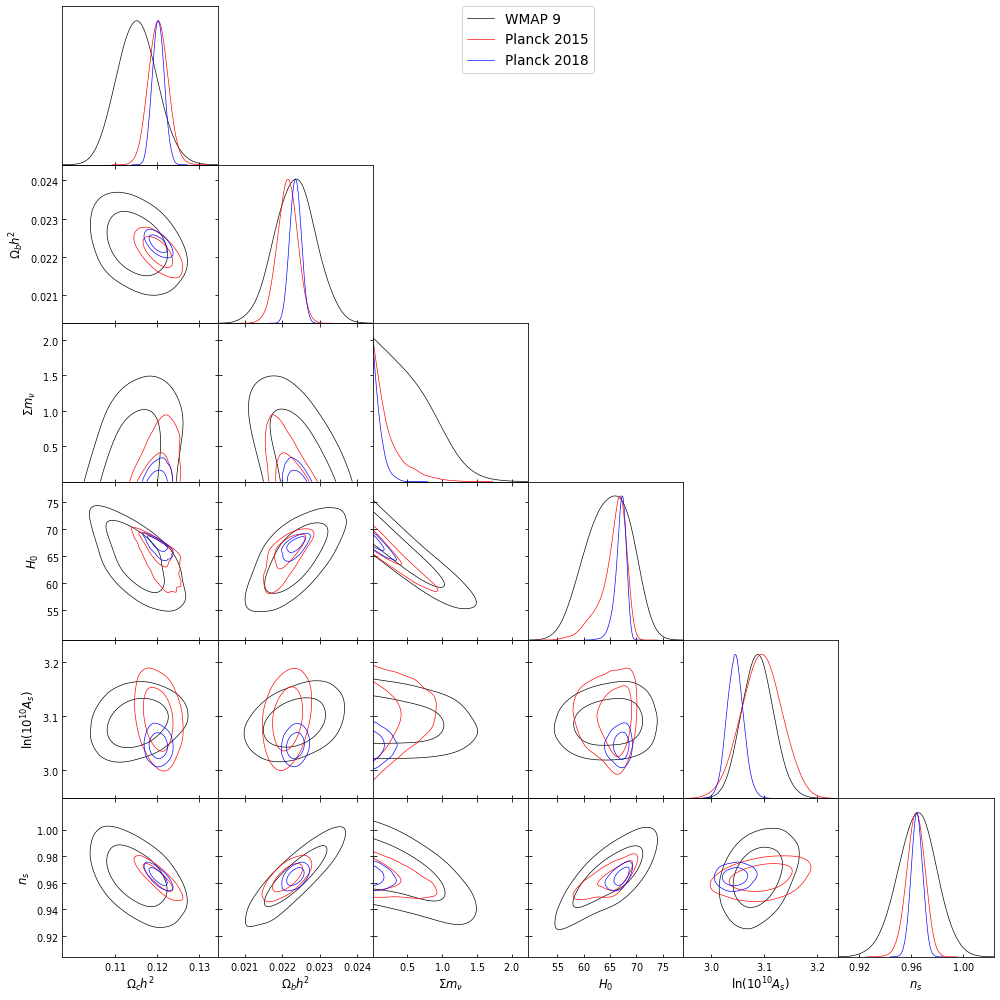

In [3]:
# plot traditional parameters
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([wmap9['samples'],planck2015['samples'],planck2018['samples']],
                ['omegach2','omegabh2','mnu','H0','logA','ns'],
                legend_labels=[wmap9['label'],planck2015['label'],planck2018['label']])

### Plot linear power parameters

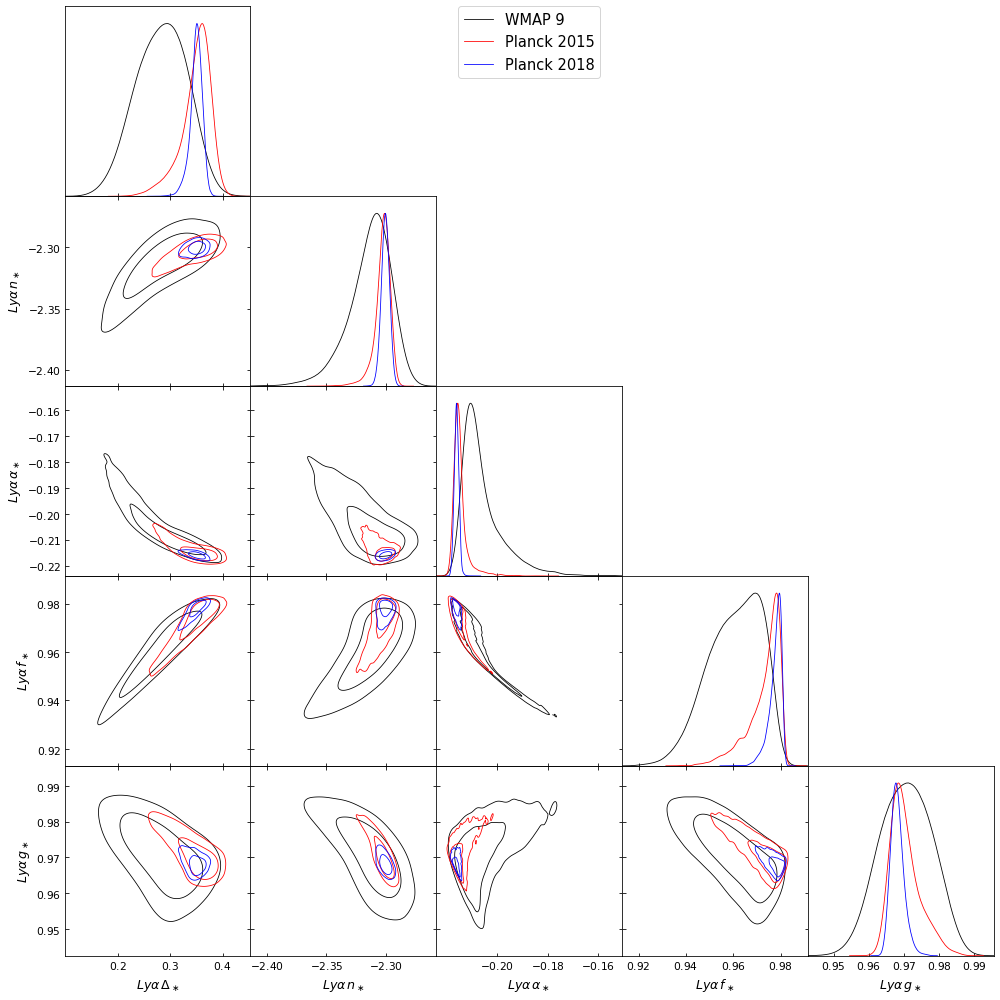

In [4]:
# linear power parameters
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([wmap9['samples'],planck2015['samples'],planck2018['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star'],
                legend_labels=[wmap9['label'],planck2015['label'],planck2018['label']])

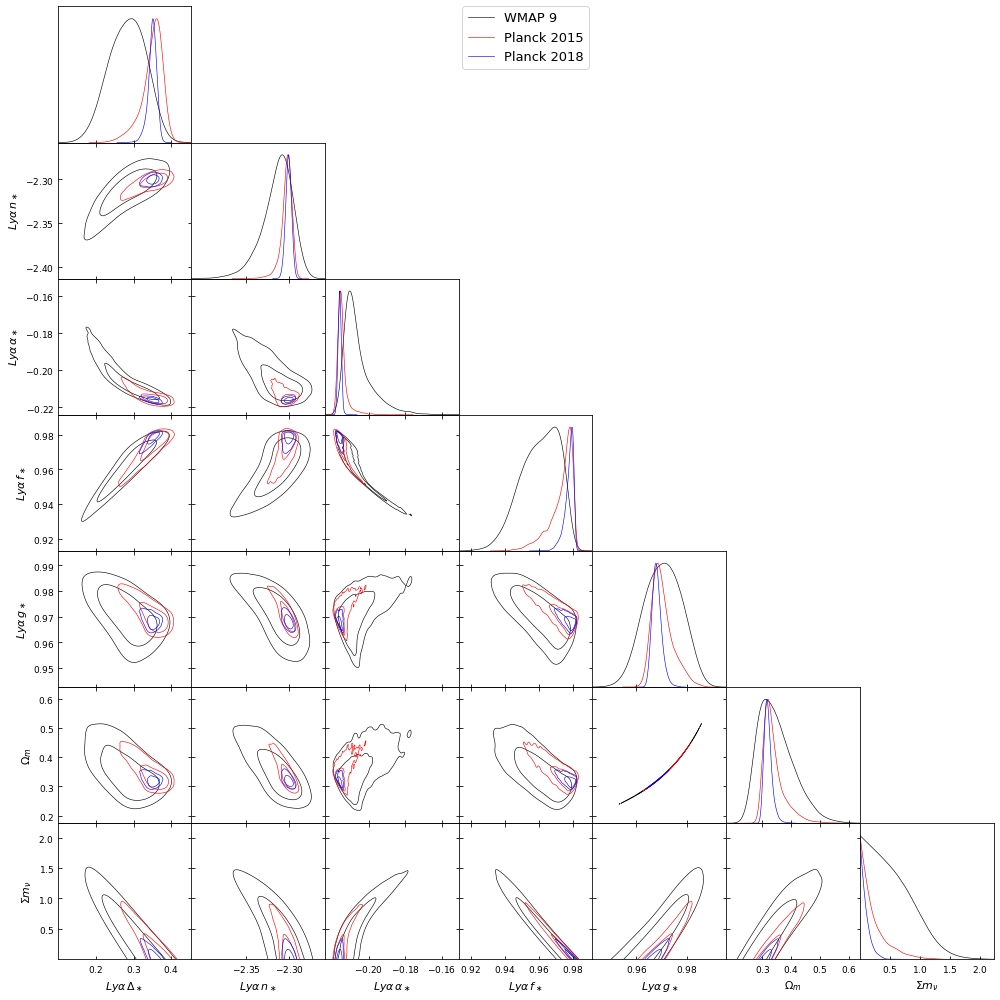

In [5]:
# linear power parameters (including now Omega_m and m_nu)
g = plots.getSubplotPlotter(width_inch=14)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([wmap9['samples'],planck2015['samples'],planck2018['samples']],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star','omegam','mnu'],
                legend_labels=[wmap9['label'],planck2015['label'],planck2018['label']])

### Plot linear power parameters from chain and from Lya likelihoods

In [6]:
# create grid (note j in number of elements, crazy python)
thresholds = [2.30,6.17,11.8]
neff_grid,DL2_grid = np.mgrid[-2.4:-2.2:100j, 0.2:0.5:100j]
chi2_Mc2005=marg_lya_like.gaussian_chi2_McDonald2005(neff_grid,DL2_grid)
chi2_PD2015=marg_lya_like.gaussian_chi2_PalanqueDelabrouille2015(neff_grid,DL2_grid)
chi2_Ch2019=marg_lya_like.gaussian_chi2_Chabanier2019(neff_grid,DL2_grid)

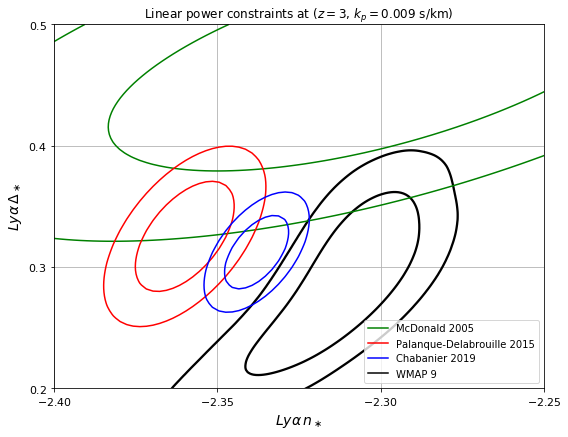

In [7]:
# specify CMB chain to plot
cmb=wmap9
g = plots.getSinglePlotter(width_inch=8)
#g.plot_2d(planck2018['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
g.plot_2d(cmb['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
#g.plot_2d(planck2018_mnu_BAO['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])
plt.contour(neff_grid,DL2_grid,chi2_Mc2005,levels=thresholds[:2],colors='green')
plt.contour(neff_grid,DL2_grid,chi2_PD2015,levels=thresholds[:2],colors='red')
plt.contour(neff_grid,DL2_grid,chi2_Ch2019,levels=thresholds[:2],colors='blue')
plt.axhline(y=1,color='green',label='McDonald 2005')
plt.axhline(y=1,color='red',label='Palanque-Delabrouille 2015')
plt.axhline(y=1,color='blue',label='Chabanier 2019')
plt.axhline(y=1,color='black',label=cmb['label'])
plt.title(r'Linear power constraints at ($z=3$, $k_p=0.009$ s/km)')
plt.grid()  
plt.legend(loc=4)